### 이상치

In [24]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 확인

In [7]:
pd.set_option('display.max.colwidth',10)
df = pd.read_csv('./data3/bicycle_out.csv', encoding= 'euc-kr')
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.00...,396.00...,420.00...,409.00...,405.00...,404.00...,420.00...
mean,243.25...,7.585859,93.338095,2.831296,21.269136,2679.6...,35.445238
std,301.14...,6.258985,26.270667,1.687148,20.237064,3028.2...,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.00...,3.000000,101.00...,1.000000,7.000000,1070.0...,24.000000
50%,117.50...,6.000000,101.00...,2.000000,14.000000,1680.0...,29.000000
75%,226.50...,10.000000,101.00...,4.000000,27.000000,3757.5...,40.000000
max,3102.0...,30.000000,101.00...,7.000000,122.00...,42070....,533.00...


### 최대 나이가 533살인 이상치 확인

### 결측치 처리

In [14]:
df_drop = df.dropna()
df_drop = df_drop.reset_index(drop=True)
df_drop.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,358.00...,358.00...,358.00...,358.00...,358.00...,358.00...,358.00...
mean,239.90...,7.578212,95.011173,2.796089,20.955307,2703.8...,35.159218
std,310.90...,6.185125,23.438336,1.668722,20.041364,3140.6...,32.747653
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.00...,3.000000,101.00...,1.000000,7.000000,1070.0...,24.000000
50%,115.00...,6.000000,101.00...,2.000000,13.000000,1680.0...,29.000000
75%,225.50...,10.000000,101.00...,4.000000,27.000000,3802.5...,39.000000
max,3102.0...,30.000000,101.00...,7.000000,122.00...,42070....,533.00...


In [17]:
df_drop[df_drop['나이'] >= 100]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-1...,512,뚝섬역 1번...,11.0,2019-1...,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-1...,419,홈플러스 앞,1.0,2019-1...,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-1...,103,망원역 2번...,4.0,2019-1...,101,(구)합정동...,2.0,5.0,1110.0,320


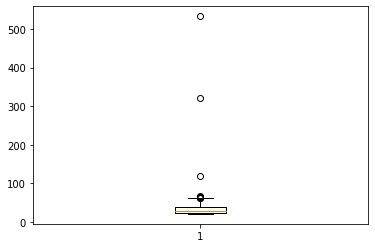

In [20]:
# 이상치 데이터 시각화
plt.boxplot(df_drop['나이'])
plt.show()

In [21]:
df_drop['나이'].describe()

count    358.00...
mean     35.159218
std      32.747653
min      21.000000
25%      24.000000
50%      29.000000
75%      39.000000
max      533.00...
Name: 나이, dtype: float64

In [25]:
# 극단치 값 계산하기
import numpy as np

In [28]:
# q1(25%), q3(75%) 데이터 확인하기
q1, q3 = np.percentile(df_drop['나이'],[25,75])
print(q1, q3)

24.0 39.0


In [31]:
iqr = q3 - q1
iqr

15.0

In [45]:
lower_bound = (q1 - 1.5*iqr) # 최소 극단치
upper_bound = (q3 + 1.5*iqr) # 최대 극단치
print(lower_bound, upper_bound)

1.5 61.5


In [49]:
df2 = df_drop[(df_drop['나이'] >= upper_bound) | (df_drop['나이'] <= lower_bound)]
df2.reset_index(drop=True)

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-07935,2019-1...,512,뚝섬역 1번...,11.0,2019-1...,3,중랑센터,7.0,10.0,1650.0,120
1,SPB-20840,2019-1...,419,홈플러스 앞,1.0,2019-1...,5,상암센터 정비실,5.0,3.0,280.0,533
2,SPB-11637,2019-1...,103,망원역 2번...,4.0,2019-1...,101,(구)합정동...,2.0,5.0,1110.0,320
3,SPB-24758,2019-1...,106,합정역 7번...,7.0,2019-1...,101,(구)합정동...,5.0,20.0,1130.0,65
4,SPB-06127,2019-1...,1925,동양미래대학...,6.0,2019-1...,101,(구)합정동...,4.0,62.0,12610.0,66
5,SPB-15960,2019-1...,103,망원역 2번...,1.0,2019-1...,101,(구)합정동...,4.0,8.0,1060.0,63
6,SPB-08818,2019-1...,108,서교동 사거리,2.0,2019-1...,101,(구)합정동...,2.0,10.0,1360.0,65
7,SPB-24781,2019-1...,104,합정역 1번...,10.0,2019-1...,101,(구)합정동...,3.0,6.0,1070.0,63
8,SPB-24781,2019-1...,101,(구)합정동...,3.0,2019-1...,101,(구)합정동...,4.0,64.0,5600.0,65
9,SPB-24858,2019-1...,113,홍대입구역 ...,21.0,2019-1...,101,(구)합정동...,1.0,11.0,2060.0,67


In [65]:
def outlier(df,col):
    q1, q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = (q1 - 1.5 * iqr) # 최소 극단치
    upper_bound = (q3 + 1.5 * iqr) # 최대 극단치
    df = df[(col >= upper_bound) | (col <= lower_bound)]
    print(upper_bound)
    print(lower_bound)
    return df

outlier(df_drop, df_drop['나이']).reset_index(drop=True)

61.5
1.5


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-07935,2019-1...,512,뚝섬역 1번...,11.0,2019-1...,3,중랑센터,7.0,10.0,1650.0,120
1,SPB-20840,2019-1...,419,홈플러스 앞,1.0,2019-1...,5,상암센터 정비실,5.0,3.0,280.0,533
2,SPB-11637,2019-1...,103,망원역 2번...,4.0,2019-1...,101,(구)합정동...,2.0,5.0,1110.0,320
3,SPB-24758,2019-1...,106,합정역 7번...,7.0,2019-1...,101,(구)합정동...,5.0,20.0,1130.0,65
4,SPB-06127,2019-1...,1925,동양미래대학...,6.0,2019-1...,101,(구)합정동...,4.0,62.0,12610.0,66
5,SPB-15960,2019-1...,103,망원역 2번...,1.0,2019-1...,101,(구)합정동...,4.0,8.0,1060.0,63
6,SPB-08818,2019-1...,108,서교동 사거리,2.0,2019-1...,101,(구)합정동...,2.0,10.0,1360.0,65
7,SPB-24781,2019-1...,104,합정역 1번...,10.0,2019-1...,101,(구)합정동...,3.0,6.0,1070.0,63
8,SPB-24781,2019-1...,101,(구)합정동...,3.0,2019-1...,101,(구)합정동...,4.0,64.0,5600.0,65
9,SPB-24858,2019-1...,113,홍대입구역 ...,21.0,2019-1...,101,(구)합정동...,1.0,11.0,2060.0,67
